In [103]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SMALL_SIZE = 8
MEDIUM_SIZE = 11
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

In [3]:
matches_df = pd.read_csv('matches.csv')
deliveries_df = pd.read_csv('deliveries.csv')

In [4]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
#Removing the Umpire3 column as all its values are NaN
matches_df.drop(columns=['umpire3'],inplace=True)
#Changing Rising Pune supergiant to Rising Pune Supergiants
matches_df = matches_df.replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants')
deliveries_df = deliveries_df.replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants')

In [6]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [7]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,0.025157,13.682390,3.372642
std,183.741666,2.773026,0.156726,23.908877,3.420338
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,0.000000,20.000000,7.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000


In [8]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
total_no_of_matches = len(matches_df.index)#636

Text(0.5, 1.0, 'IS TOSS WINNER THE MATCH WINNER ?')

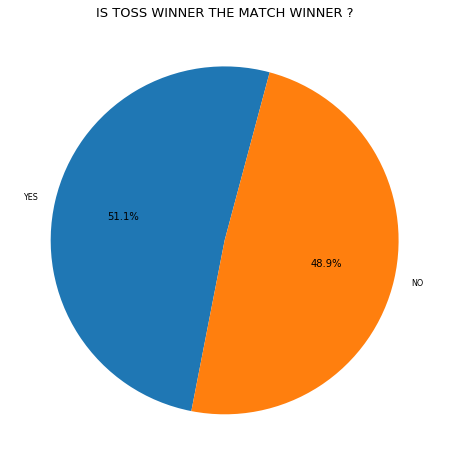

In [10]:
count = 0
for i in range(0,total_no_of_matches):
    if(matches_df['toss_winner'][i] == matches_df['winner'][i]):
        count+=1
#print(count)
percentage = count/total_no_of_matches*100
plt.subplots(figsize=(8,8))
plt.pie([percentage,100-percentage],labels=['YES','NO'],autopct='%1.1f%%',startangle=75)
plt.title('IS TOSS WINNER THE MATCH WINNER ?',fontsize=13)

In [11]:
result = matches_df['result'].value_counts()
result

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [12]:
dl = matches_df['dl_applied'].value_counts()
dl

0    620
1     16
Name: dl_applied, dtype: int64

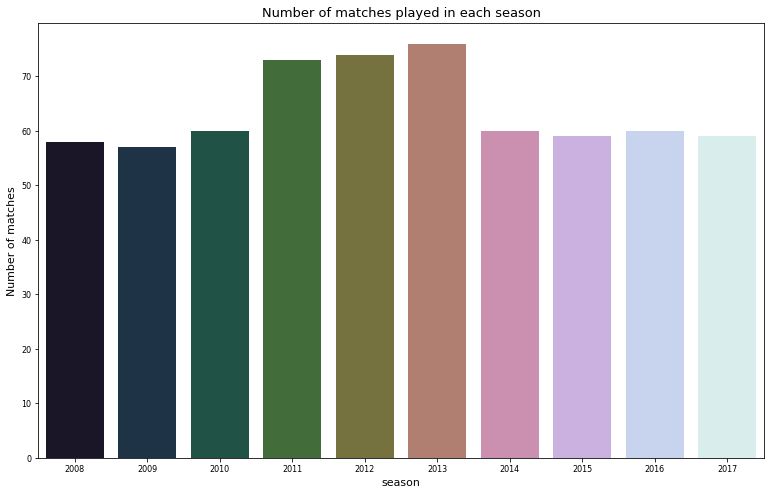

In [13]:
#Number of matches played in different seasons
plt.subplots(figsize=(13,8))
plot = sns.countplot(x='season',data=matches_df,palette=sns.color_palette('cubehelix',10))
plt.ylabel('Number of matches')
plt.title('Number of matches played in each season',fontsize=13)
plt.show()


Text(0.5, 1.0, 'Total runs scored in each season')

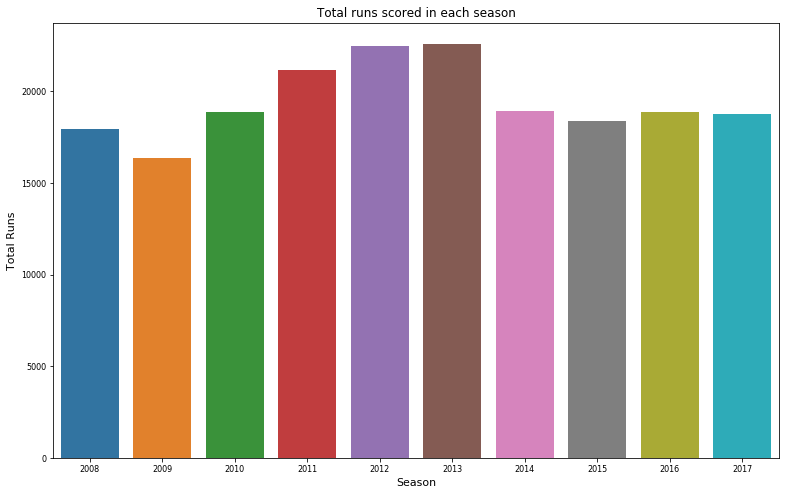

In [14]:
#Total runs in each season
merged_df = matches_df[['id','season']].merge(deliveries_df, left_on = 'id', right_on = 'match_id', how = 'left')#.drop('id', axis = 1)
season_runs = merged_df.groupby(['season'])['total_runs'].sum().reset_index()
plt.subplots(figsize=(13,8))
plot = sns.barplot(x='season',y='total_runs',data=season_runs)
plot.set_xlabel('Season')
plot.set_ylabel('Total Runs')
plot.set_title('Total runs scored in each season',fontsize=12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

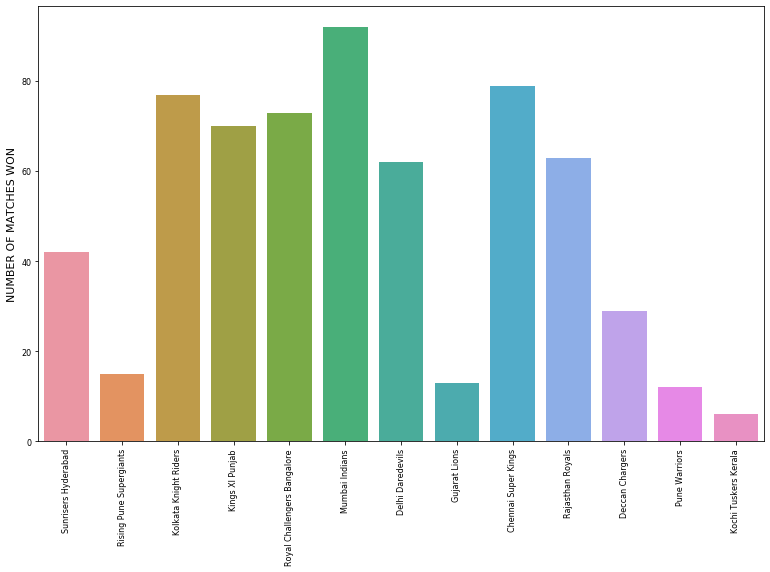

In [15]:
#Total matches won by each team
plt.subplots(figsize=(13,8))
sns.countplot(x='winner',data=matches_df)
plt.ylabel('NUMBER OF MATCHES WON')
plt.xlabel('')
plt.xticks(rotation = 90)

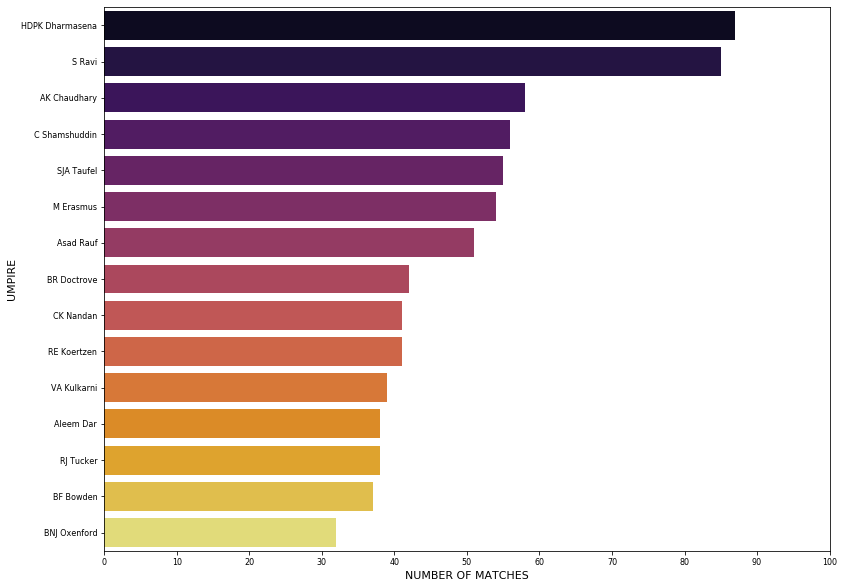

In [16]:
umpire = pd.DataFrame(pd.concat([matches_df['umpire1'], matches_df['umpire2']]),columns = ['umpire'])
plt.subplots(figsize=(13,10))
fig = sns.countplot(y='umpire',data=umpire,order=umpire.umpire.value_counts().iloc[:15].index,palette=sns.color_palette('inferno',15))
fig.set(xlabel='NUMBER OF MATCHES',ylabel='UMPIRE')
plt.xticks(np.arange(0,101,10))
plt.show()

Toss decisions in different seasons

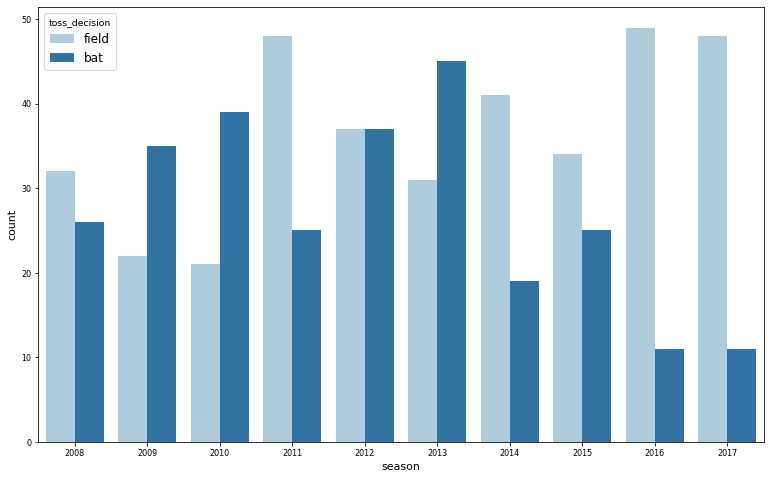

In [17]:
plt.subplots(figsize=(13,8))
sns.countplot(x='season',hue='toss_decision',data=matches_df,palette=sns.color_palette('Paired'))

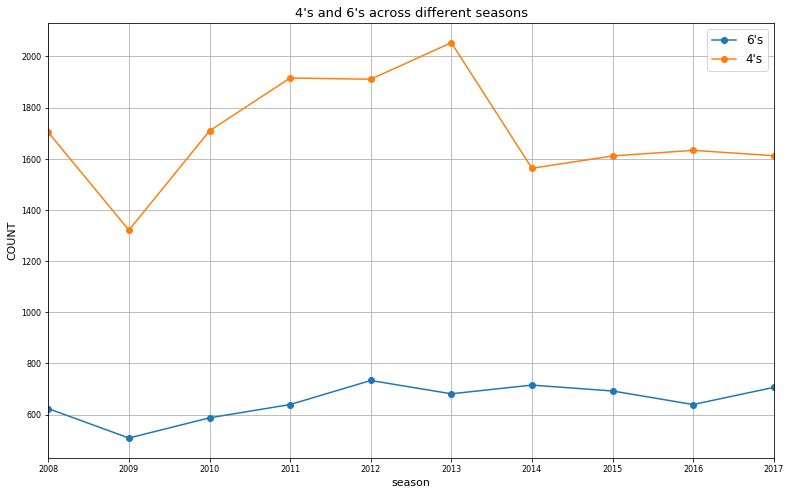

In [45]:
#Sixes and fours across different seasons
season = matches_df[['id','season']].merge(deliveries_df, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
sixes = season.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index().rename(columns={'batsman_runs':"6's"})
fours = season.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index().rename(columns={'batsman_runs':"4's"})
Season_boundaries=sixes.merge(fours,left_on='season',right_on='season',how='left')
Season_boundaries.set_index('season')[["6's","4's"]].plot(marker='o',grid=True)
fig=plt.gcf()
fig.set_size_inches(13,8)
plt.title("4's and 6's across different seasons",fontsize=13)
plt.ylabel('COUNT')
plt.show()

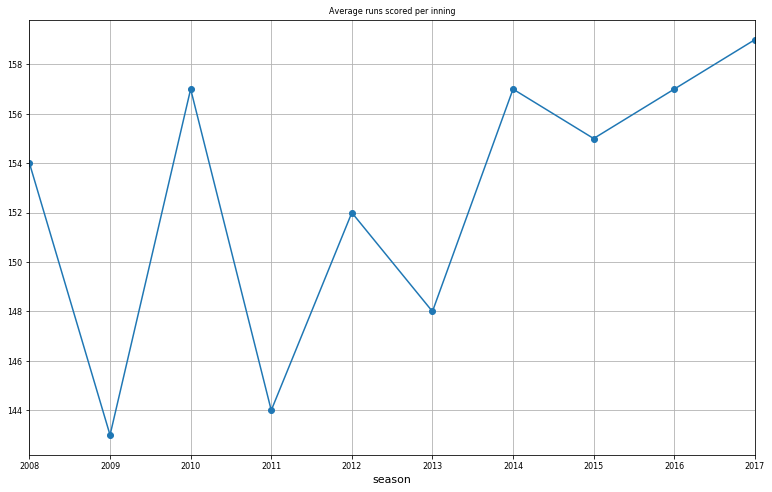

In [19]:
inning1 = season[(season['inning']==1)].groupby(['season'])['total_runs'].sum().reset_index().rename(columns = {'total_runs' : 'inning1'})
inning2 = season[(season['inning']==2)].groupby(['season'])['total_runs'].sum().reset_index().rename(columns = {'total_runs' : 'inning2'})

avg_runs = inning1.merge(inning2,left_on='season',right_on ='season',how = 'left')
avg_runs['count'] = matches_df.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'count'})['count']

avg_runs['avg_inning1'] = avg_runs.apply(lambda x: int(round(x['inning1']/x['count'])), axis=1)
avg_runs['avg_inning2'] = avg_runs.apply(lambda x: int(round(x['inning2']/x['count'])), axis=1)
avg_runs['avg_per_inning'] = (avg_runs['avg_inning1'] + avg_runs['avg_inning2'])//2
avg_runs.set_index('season')['avg_per_inning'].plot(marker ='o',grid = True,title = 'Average runs scored per inning')
fig=plt.gcf()
fig.set_size_inches(13,8)
plt.show()
# print(avg_runs)

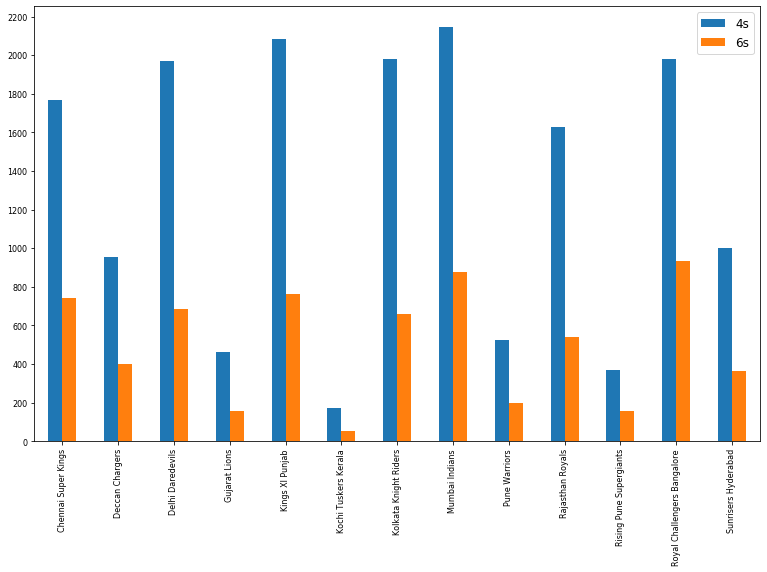

In [64]:
#4s and 6s scored by different teams

fours = deliveries_df.groupby(['batting_team'])['batsman_runs'].agg(lambda x:(x==4).sum()).reset_index().rename(columns={'batsman_runs':'4s'})
sixes = deliveries_df.groupby(['batting_team'])['batsman_runs'].agg(lambda x:(x==6).sum()).reset_index().rename(columns={'batsman_runs':'6s'})
boundaries = fours.merge(sixes,left_on='batting_team',right_on='batting_team',how='left')
#print(fours)
#print(sixes)
#print(boundaries)
plot = boundaries.set_index('batting_team').plot(kind='bar',figsize=(13,8))
plt.xticks(np.arange(0,13,1))
plot.set_xticklabels=['CSK','DC','DD','GL','KXIP','KTK','MI','PW','RPS','RCB','SRH']
plt.yticks(np.arange(0,2201,200))
plt.xlabel('')
plt.show()

In [21]:
print("Winners by years")
winners = matches_df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']]
winners = winners.sort_values(by='season').reset_index(drop=True)
winners

Winners by years


,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


Text(0, 0.5, 'NUMBER OF TIMES')

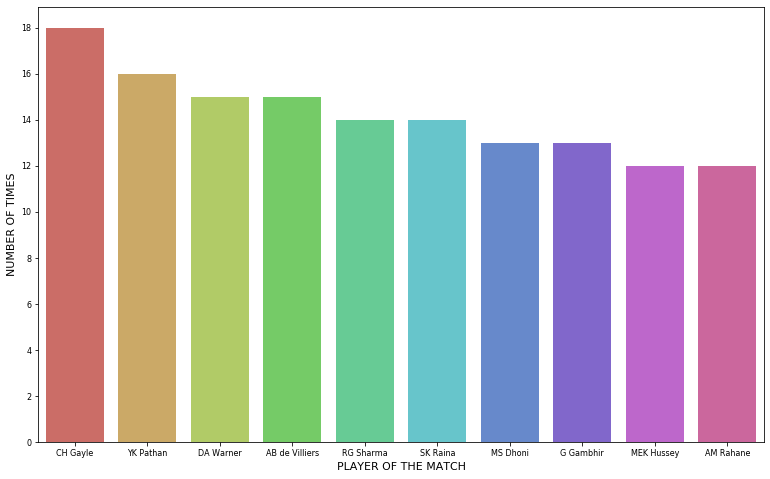

In [66]:
plt.subplots(figsize=(13,8))
plt.yticks(np.arange(0,19,2))
potm = pd.DataFrame(matches_df['player_of_match'].value_counts().head(10)).reset_index()
potm = potm.rename(columns={'index':'player_of_match','player_of_match':'count'})
plot = sns.barplot(x=potm['player_of_match'],y=potm['count'],palette=sns.color_palette('hls',10))
plot.set_xlabel('PLAYER OF THE MATCH')
plot.set_ylabel('NUMBER OF TIMES')


In [23]:
potm

,player_of_match,count
0,CH Gayle,18
1,YK Pathan,16
2,DA Warner,15
3,AB de Villiers,15
4,RG Sharma,14
5,SK Raina,14
6,MS Dhoni,13
7,G Gambhir,13
8,MEK Hussey,12
9,AM Rahane,12


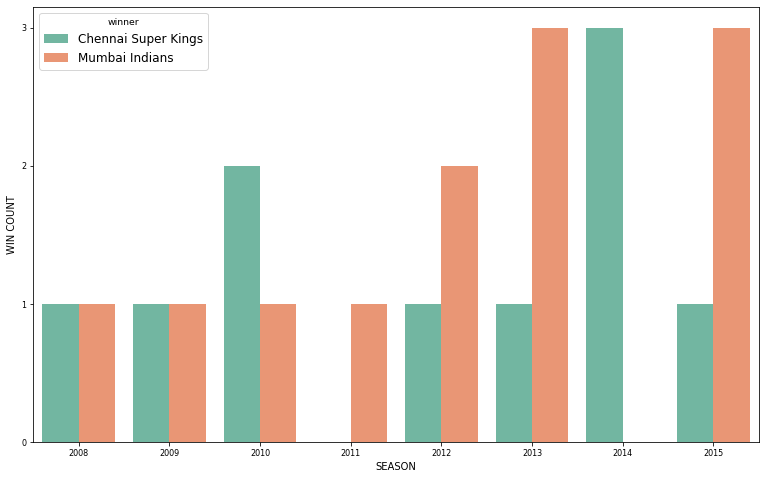

In [24]:
#compare two teams
def team_comparator(team1,team2):
    compare = matches_df[((matches_df['team1']==team1) | (matches_df['team2']==team1)) & ((matches_df['team1']==team2) | (matches_df['team2']==team2))]
    plt.subplots(figsize=(13,8))
    plt.yticks(np.arange(0,4,1))
    plot = sns.countplot(x='season', hue='winner',data = compare,palette=sns.color_palette('Set2'))
    plot.set_xlabel('SEASON',fontsize=10)
    plot.set_ylabel('WIN COUNT',fontsize=10)
team_comparator('Mumbai Indians','Chennai Super Kings')


Text(0, 0.5, 'RUNS SCORED')

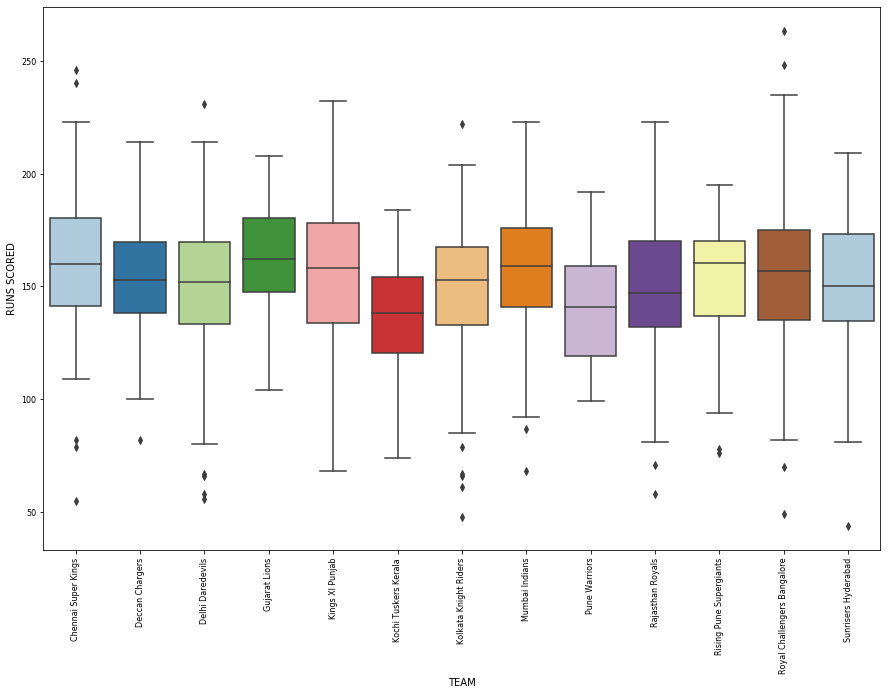

In [25]:
#Boxplot of scores of different teams
df = deliveries_df.groupby(['match_id','batting_team'])['total_runs'].sum().reset_index()
df = df[df['total_runs'] > 40]
df = df.sort_values(by=['batting_team'])
plt.subplots(figsize=(15,10))
plt.xticks(rotation=90)
plot = sns.boxplot(x='batting_team',y = 'total_runs',data=df,palette=sns.color_palette('Paired',13))
# plot.set_title(team,fontsize=15)
plot.set_xlabel('TEAM',fontsize = 10)
plot.set_ylabel('RUNS SCORED',fontsize=10)

In [26]:
#Team scores in different seasons
df1 = matches_df.merge(deliveries_df,left_on='id',right_on='match_id',how='left')
df1 = df1.groupby(['id','season','batting_team','result'])['total_runs'].sum().reset_index() #groupby(..'result') in order to exclude matches with not result
df1 = df1.sort_values(by=['season','batting_team'])

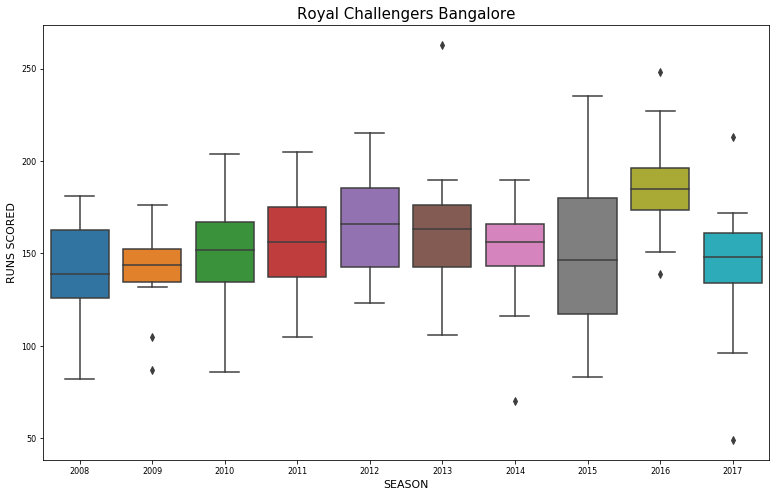

In [27]:
def team_plot(team):
    team_df =df1[(df1['batting_team'] == team) & (df1['result'] != 'no result')]
    plt.subplots(figsize=(13,8))
    plot = sns.boxplot(x='season',y='total_runs',data=team_df)
    plot.set_title(team,fontsize=15)
    plot.set_xlabel('SEASON')
    plot.set_ylabel('RUNS SCORED')
team_plot('Royal Challengers Bangalore')

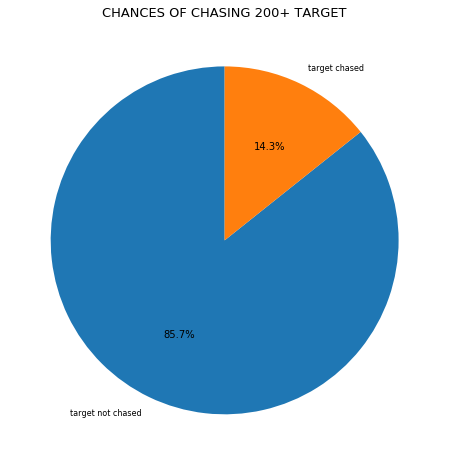

In [40]:
#200+ scores
# high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
# high_scores=high_scores[high_scores['total_runs']>=200]
#
high_scores = deliveries_df.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1 = high_scores[high_scores['inning'] == 1]
high_scores2 = high_scores[high_scores['inning'] == 2]
high_scores1 = high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1 = high_scores1[high_scores1['inning1_runs'] >= 200]
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs'] <= high_scores1['inning2_runs'],'yes', 'no')
#Probability of chasing 200+ scores
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased
labels=['target not chased','target chased']
plt.pie(slices,labels=labels,startangle=90,autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('CHANCES OF CHASING 200+ TARGET',fontsize=13)
plt.show()
#number of matches with 200+ scores
n = len(high_scores1)#49

Text(0.5, 1.0, 'BATSMAN WITH MOST RUNS')

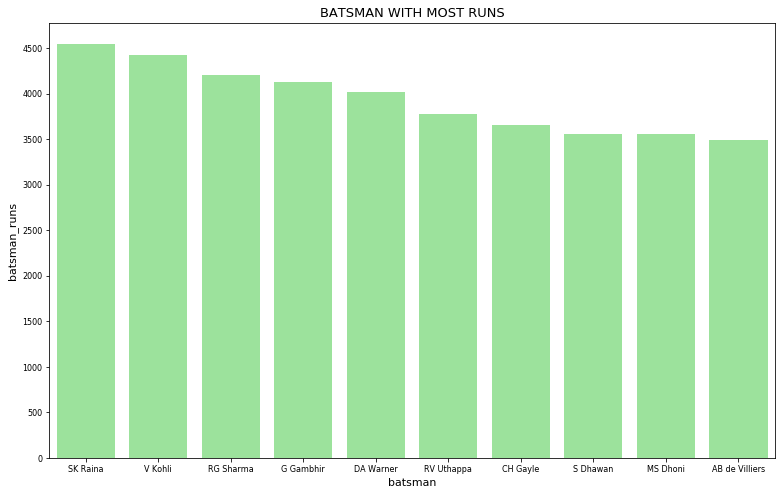

In [98]:
#batsman with most runs
temp_df = deliveries_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
plt.subplots(figsize=(13,8))
sns.barplot(x='batsman',y='batsman_runs',data=temp_df,color='lightgreen')
plt.yticks(np.arange(0,5000,500))
plt.title('BATSMAN WITH MOST RUNS',fontsize=13)

In [30]:
#Probability that rcb wins if virat scores 55+
merged_df = matches_df[['id','season','winner']].merge(deliveries_df, left_on = 'id', right_on = 'match_id', how = 'left')
rcb = merged_df[(merged_df['batting_team'] == 'Royal Challengers Bangalore') | (merged_df['bowling_team'] == 'Royal Challengers Bangalore')]
virat = rcb[rcb['batsman'] == 'V Kohli']
virat = virat.groupby(['match_id','winner'])['batsman_runs'].sum().reset_index()
virat = virat[(virat['batsman_runs'] > 55)].reset_index()
n = len(virat)
x = len(virat[virat['winner'] == 'Royal Challengers Bangalore']) 
print('n = ',n,'x = ',x)
p = round(x/n,2)
print('p = ',p)

n =  28 x =  17
p =  0.61


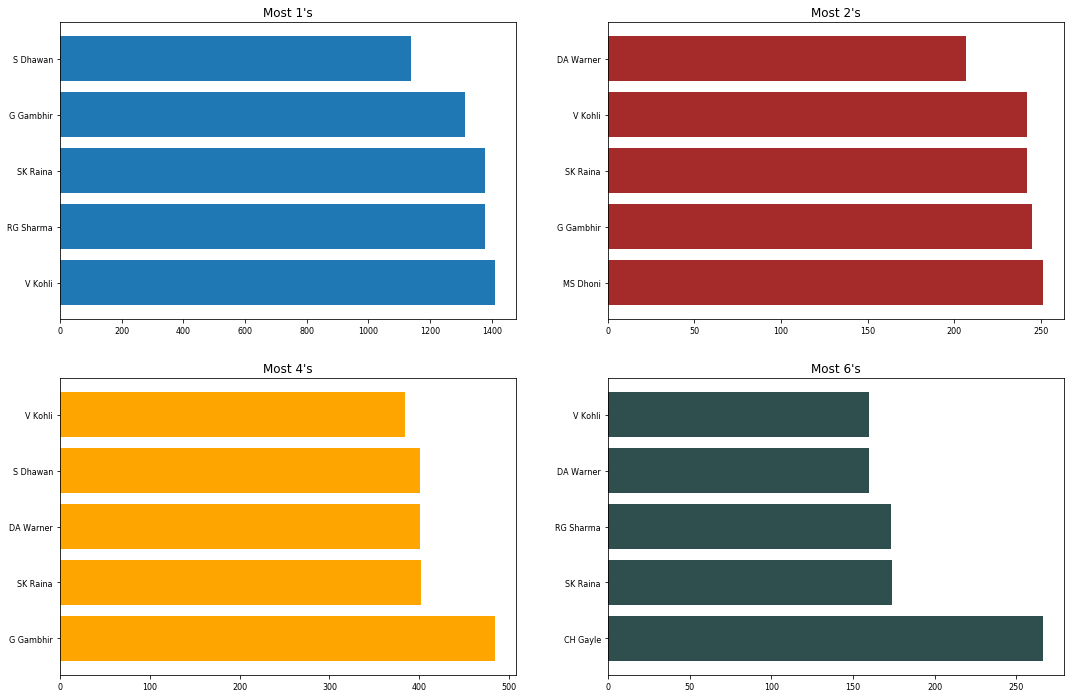

In [31]:
toppers=deliveries_df.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=plt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],width=0.8)
ax[0,0].set_title("Most 1's",fontsize=12)
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#A52A2A',width=0.8)
ax[0,1].set_title("Most 2's",fontsize=12)
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#ffa500',width=0.8)
ax[1,0].set_title("Most 4's",fontsize=12)
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#2F4F4F',width=0.8)
ax[1,1].set_title("Most 6's",fontsize=12)
ax[1,1].set_ylabel('')
plt.show()

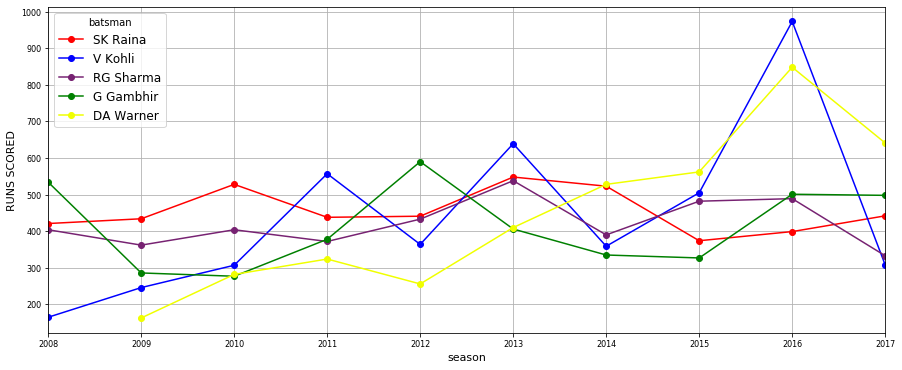

In [41]:
#Runs scored by top batsmen across different seasons
a=season.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending = False)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o',grid = True)
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.ylabel('RUNS SCORED')
plt.show()
#David Warner's form looks to be improving season by season. There has been a sharp decline in Kohli's Runs from 2016 to 2017.
#Virat Kohli holds the record of most runs in a season 973

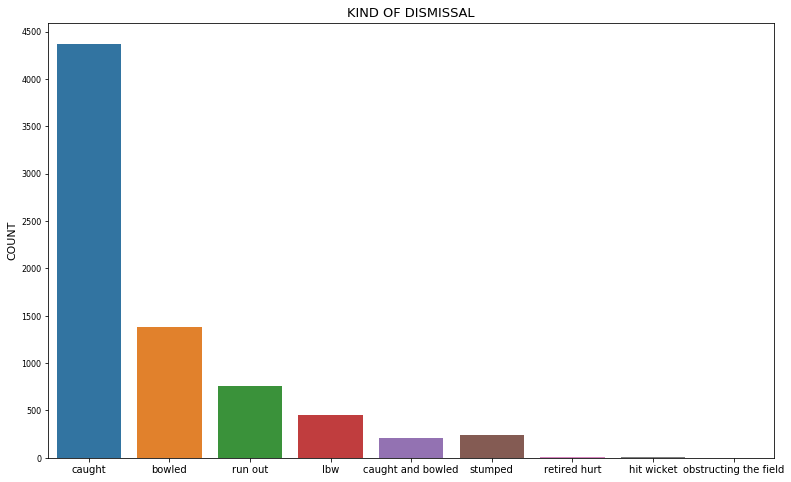

In [104]:
#Types of dismissal
plt.figure(figsize=(13,8))
plot = sns.countplot(x='dismissal_kind', data=deliveries_df)
plot.set_xlabel('')
plot.set_ylabel('COUNT',fontsize=11)
plt.title('KIND OF DISMISSAL',fontsize=13)
plt.yticks(np.arange(0,5000,500))
plt.show()
#The most common dismissal type in IPL is caught followed by bowled. There are very few instances of hit wicket as well.

Text(0.5, 1.0, 'Bowlers with most Wickets')

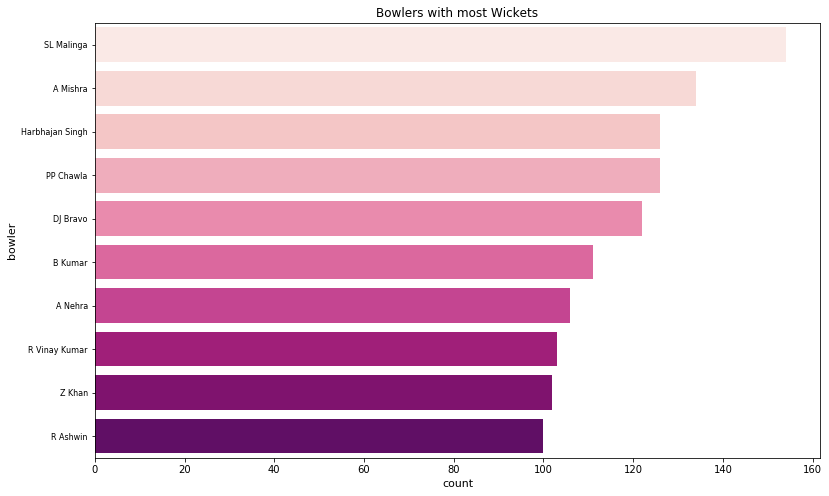

In [106]:
#Bowlers with most number of wickets
top_bowlers = deliveries_df[deliveries_df["dismissal_kind"].isin(["bowled", "caught", "lbw", "stumped", "caught and bowled"])]
plt.subplots(figsize=(13,8))
plot = sns.countplot(y='bowler',data=top_bowlers,order=top_bowlers['bowler'].value_counts().iloc[:10].index,palette='RdPu')
plot.set_title('Bowlers with most Wickets',fontsize=12)
#Lasith Malinga leads the chart. Other bowlers have a very small wicket margin between them.

In [35]:
#Most economical bowlers min 150 overs bowled
economy = deliveries_df.groupby(['bowler']).sum()
economy['total balls']=deliveries_df['bowler'].value_counts()
economy['overs_bowled']=(economy['total balls']//6)
economy['economy']=(economy['total_runs']/(economy['overs_bowled']))
economy[(economy['overs_bowled'] > 150)].sort_values(by = 'economy')[:5].economy.reset_index()

,bowler,economy
0,SP Narine,6.395706
1,R Ashwin,6.493639
2,DW Steyn,6.615599
3,A Kumble,6.680982
4,M Muralitharan,6.711027


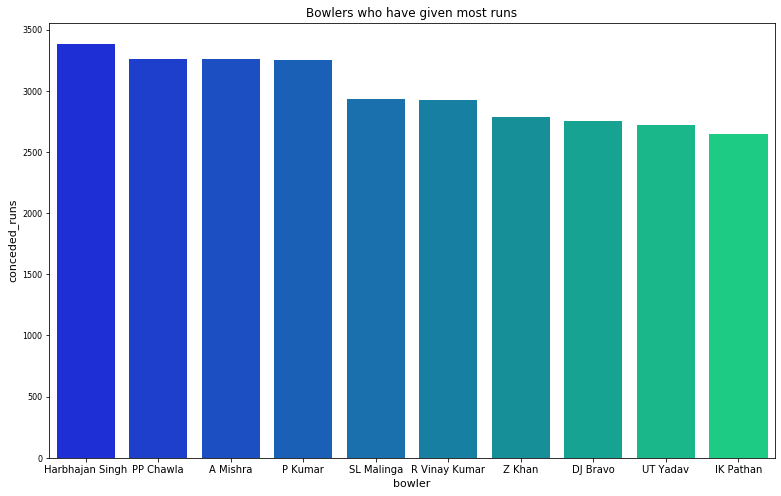

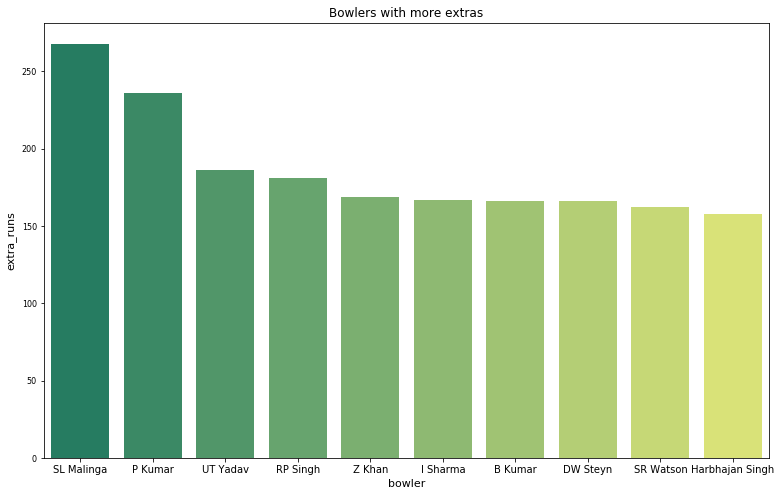

In [108]:
#
temp_df = deliveries_df.groupby('bowler')['total_runs'].sum().reset_index()
temp_df['bye_runs'] = deliveries_df.groupby('bowler')['bye_runs'].sum().reset_index()['bye_runs']
temp_df['legbye_runs'] = deliveries_df.groupby('bowler')['legbye_runs'].sum().reset_index()['legbye_runs']
temp_df['conceded_runs'] = (temp_df['total_runs'] - temp_df['bye_runs'] - temp_df['legbye_runs'])
temp_df['extra_runs'] =  deliveries_df.groupby('bowler')['extra_runs'].sum().reset_index()['extra_runs']
# Bowler who has conceded most runs
# temp_df = temp_df.sort_values(by = 'conceded_runs',ascending = False).reset_index(drop = True)
plt.subplots(figsize=(13,8))
plot = sns.barplot(x='bowler',y='conceded_runs',data = temp_df.sort_values(by='conceded_runs',ascending = False)[:10],palette='winter')
plot.set_title('Bowlers who have given most runs',fontsize=12)
plt.show()
# Bowler who has conceded most extras
temp_df = temp_df.sort_values(by = 'extra_runs',ascending = False).reset_index(drop = True)
plt.subplots(figsize=(13,8))
plot = sns.barplot(x='bowler',y='extra_runs',data = temp_df.sort_values(by='extra_runs',ascending = False)[:10],palette='summer')
plot.set_title('Bowlers with more extras',fontsize=12)
plt.show()

In [37]:
#Highest Dismissals for a Batsman by a Bowler
def most_dismissal_by(batsman):
    temp_df = deliveries_df[deliveries_df['batsman'] == batsman]
    temp_df = temp_df[temp_df['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled','hit wicket'])]
    temp_df = temp_df.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
    temp_df['batsman'] = batsman
    temp_df = temp_df[['batsman','bowler','dismissal_kind']]
    temp_df.columns=['batsman','bowler','No_of_Dismissals']
    return temp_df
#     print('Batsman: ',batsman,'\nBowler: ',temp_df['bowler'][0],'\nNo of dismissals: ',temp_df['dismissal_kind'][0])

df = most_dismissal_by('V Kohli').append(most_dismissal_by('CH Gayle')).append(most_dismissal_by('RG Sharma')).append(most_dismissal_by('AB de Villiers')).append(most_dismissal_by('MS Dhoni')).reset_index(drop=True)
df

,batsman,bowler,No_of_Dismissals
0,V Kohli,A Nehra,6
1,CH Gayle,R Ashwin,4
2,RG Sharma,R Vinay Kumar,6
3,AB de Villiers,KH Pandya,4
4,MS Dhoni,Z Khan,7


No handles with labels found to put in legend.


 u_x =  162.6 u_y =  150.26315789473685
 sd_x =  29.35 sd_y =  23.96
 sigma =  4.94 z =  2.5 
 p = 0.0063


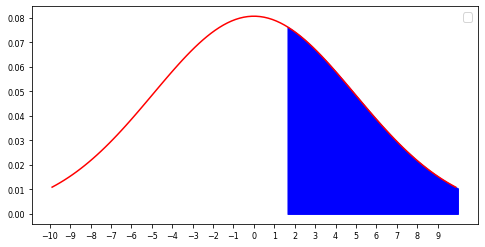

In [94]:
import scipy.stats as stats
#Hypothesis Testing
#Average 1st innings score in 2016 > 2009
score16 = merged_df[(merged_df['season'] == 2016) & (merged_df['inning'] == 1)]
score16 = score16.groupby(['match_id'])['total_runs'].sum().reset_index()
score09 = merged_df[(merged_df['season'] == 2009) & (merged_df['inning'] == 1)]
score09 = score09.groupby(['match_id'])['total_runs'].sum().reset_index()
# print(score15,'\n',score16)
n_x = len(score16)#60
n_y = len(score09)#59
u_x = np.mean(score16['total_runs'])
u_y = np.mean(score09['total_runs'])
print(' u_x = ',u_x,'u_y = ',u_y)
sd_x = np.std(score16['total_runs'])
sd_y = np.std(score09['total_runs'])
print(' sd_x = ',round(sd_x,2),'sd_y = ',round(sd_y,2))
variance = (sd_x**2)/n_x + (sd_y**2)/n_y
sigma = variance**0.5
# print(variance)
mu = 0
a = 0.05
z = ((u_x-u_y) - mu)/sigma
p_value = stats.norm.sf(z)
print(' sigma = ',round(sigma,2),'z = ',round(z,2),'\n','p =',round(p_value,4))
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)
z_a = stats.norm.ppf(0.05)
plt.figure(figsize=(8,4))
plt.plot(x, stats.norm.pdf(x,mu,sigma), color= 'red')
section = np.arange(-z_a,10,1/20.)
plt.fill_between(section, stats.norm.pdf(section,mu,sigma), color='blue')
plt.xticks(np.arange(-10,10,1))
plt.legend(loc = 'upper right')
plt.show()